# GFS 16 day forecast

<b>Table of Contents</b>

- Overview
- Setup
    - Get authentication token
- Data layers
    - Data layer dimensions
- Querying the data layers
    - Point query
    - Raster query
- References


## Overview

The Global Forecast System (GFS) is a global numerical weather prediction system containing a global computer model and variational analysis run by the United States National Weather Service (NWS). The mathematical model is run four times a day, and produces forecasts for up to 16 days in advance, but with decreased spatial resolution after 10 days. This Data Set currently contains forecasts from the daily 18:00 UTC run. Moreover, timestamps generally correspond to the valid time of the forecast; that is, the timestamp the forecast is for. All layers in this Data Set have a dimension called "horizon", indicating the difference between the issue and valid time in hours. Thus, one obtains a forecast for 0:00 UTC issued at 18:00 the day before by querying 0:00 with "horizon" 6.

Let us get a practical understanding about this Data Set and its usage through this tutorial.

## Setup

Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample, mentioned in the cell below.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the config below.

```config.read('../../../../auth/secrets.ini')```

In [ ]:
%pip install ibmpairs
%pip install configparser
%pip install matplotlib
%pip install ipyplot

In [1]:
import ibmpairs.client as client
import ibmpairs.catalog as catalog
import ibmpairs.query as query
import pandas as pd
import configparser
import json
import numpy as np
from PIL import Image as PILImage
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os
import ipyplot


Now, we shall create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

### Get authentication token

In [14]:
config = configparser.RawConfigParser()
config.read('../../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id')  

EI_client_v3  = client.get_client(api_key   = EI_API_KEY,
                                    tenant_id = EI_TENANT_ID,
                                    org_id    = EI_ORG_ID,
                                    legacy    = False,
                                    version   = 3
                                   )

2025-01-22 11:30:09 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-01-22 11:30:09 - paw - INFO - Legacy Environment is False
2025-01-22 11:30:09 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-01-22 11:30:12 - paw - INFO - Authentication success.
2025-01-22 11:30:12 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


## Data layers

We would start by querying the ibmpairs catalog to retrieve the Data Set ID and the Data Layers that form the Data Set.

In [15]:
pd.set_option('display.max_colwidth', None)
search_df=catalog.search("GFS 16 day forecast")
search_df[['dataset_id','data_layer_id','data_layer_name','data_layer_description_short',
           'data_layer_level','data_layer_type','data_layer_unit','data_set_name','data_set_description_short']]

,dataset_id,data_layer_id,data_layer_name,data_layer_description_short,data_layer_level,data_layer_type,data_layer_unit,data_set_name,data_set_description_short
0,330,50195,Ground temperature,,11,Raster,K,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."
1,330,50196,Ground relative humidity,,11,Raster,,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."
2,330,50197,Solar irradiance (GHI),,11,Raster,w m-2,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."
3,330,50198,Wind towards east (10 meter),,11,Raster,m s-1,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."
4,330,50199,Wind towards north (10 meter),,11,Raster,m s-1,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."
5,330,50200,Wind towards east (100 meter),,11,Raster,m s-1,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."
6,330,50201,Wind towards north (100 meter),,11,Raster,m s-1,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."
7,330,50202,Surface pressure,,11,Raster,Pa,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."
8,330,50203,Average precipitation,,11,Raster,mm hour-1,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."
9,330,50204,Maximum temperature,,11,Raster,K,GFS 16 day forecast,"Medium range weather forecast, up to 16 days, that is issued by the Global Forecast System (GFS) from the National Centers for Environmental Prediction (NCEP)."


As seen above, the GFS 16 day forecast Data Set of ID 330 has eleven Data Layers. These Data Layers are a collections of various atmospheric variables, including temperatures, winds, humidity, precipitation and solar irradiance. Each of the Data Layers are identified by a unique Data Layer ID. To gain a better understanding of the Data Set and its geospatial and temporal coverage as well as other relevant metadata, we can make further queries to the ibmpairs catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

### Data layers dimensions

Each of the Data Layer of the GFS 16 day forecast Data Set has Dimensions. A Data Layer Dimension gives context to the value recorded for the Data Layer. GFS 16 day forecast Data Layers has a single dimension called `horizon`, indicating the forecast horizon in `hours`. Here, the forecast `horizon` is defined as the difference between the forecast's valid and issue dates. In other words: `valid date` = `issue date` + `horizon`.

For more understanding of the GFS 16 day forecast Data Layer Dimensions, we can make further queries to the ibmpairs catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

Refer the table below for GFS 16 day forecast Data Layers and its Dimensions. 

#### List of data layers dimensions

<div style="display: inline-block">
    
| Data Layer ID |  Data Layer Name   | Dimensions | Dimensions Values|
|:---------------|:-------------------|:---------   |:-------------- |
| 50195       | Ground temperature |   <b>horizon</b>|  3x as hours for 10 days, where x ranges from 0 to 80| 
|             |                    |                 |  12x as hours for next 6 days, where x ranges from 21 to 32| 
| 50196       | Ground relative humidity    |   <b>horizon</b>   | 3x as hours for 240hrs(10 days), where x ranges from 0 to 80  | 
|             |                    |                 |  12x as hours for next 6 days, where x ranges from 21 to 32 | 
| 50197       | Solar irradiance (GHI)	    |   <b>horizon</b>   |  3x as hours for 240hrs(10 days), where x ranges from 0 to 80 | 
|             |                    |                 |  12x as hours for next 6 days, where x ranges from 21 to 32 | 
| 50198       | Wind towards east (10 meter) |   <b>horizon</b>   | 3x as hours for 240hrs(10 days), where x ranges from 0 to 80| 
|             |                    |                 |  12x as hours for next 6 days, where x ranges from 21 to 32 | 
| 50199       | Wind towards north (10 meter)|   <b>horizon</b>   | 3x as hours for 240hrs(10 days), where x ranges from 0 to 80  | 
|             |                    |                 |  12x as hours for next 6 days, where x ranges from 21 to 32 | 
| 50200       | Wind towards east (100 meter) |   <b>horizon</b>   |3x as hours for 240hrs(10 days), where x ranges from 0 to 80 | 
|             |                    |                 | 12x as hours for next 6 days, where x ranges from 21 to 32 | 
| 50201       | Wind towards north (100 meter) |   <b>horizon</b>   | 3x as hours for 240hrs(10 days), where x ranges from 0 to 80  | 
|             |                    |                 | 12x as hours for next 6 days, where x ranges from 21 to 32 | 
| 50202       | Surface pressure     |   <b>horizon</b>   | 3x as hours for 240hrs(10 days), where x ranges from 0 to 80 | 
|             |                    |                 |  12x as hours for next 6 days, where x ranges from 21 to 32| 
| 50203       | Average precipitation |   <b>horizon</b>   |  3x as hours for 240hrs(10 days), where x ranges from 0 to 80| 
|             |                    |                 |  12x as hours for next 6 days, where x ranges from 21 to 32| 
| 50204       | Maximum temperature   |   <b>horizon</b>   | 3x as hours for 240hrs(10 days), where x ranges from 0 to 80  | 
|             |                    |                 |  12x as hours for next 6 days, where x ranges from 21 to 32| 
| 50205       | Minimum temperature  |   <b>horizon</b>   | 3x as hours for 240hrs(10 days), where x ranges from 0 to 80 | 
|             |                    |                 | 12x as hours for next 6 days, where x ranges from 21 to 32 | 

</div>


## Querying the data dayers
### Point query

Next, let us make a point query for locations to observe atmospheric conditions and gauge various values of temperatures, winds, humidity, precipitation and solar irradiance of that location. We can give a list of the Data Layers of GFS 16 day forecast Data Set in form of Data Layer Id, the point coordinates of the locations, temporal period and the respective Data Layer Dimensions we are interested in exploring the atmospheric information. 

In [16]:
query_result = query.submit(
    {
        "layers": [
            {
              "type": "raster",
              "id": "50195",
              "dimensions": [{"name": "horizon","value": "3"}]
            },
            {
              "type": "raster",
              "id": "50196",
              "dimensions": [{"name": "horizon","value": "12"}]
            },
            {
              "type": "raster",
              "id": "50197",
              "dimensions": [{"name": "horizon","value": "42"}]
            },
            {
              "type": "raster",
              "id": "50198",
              "dimensions": [{"name": "horizon","value": "135"}]
            },
            {
              "type": "raster",
              "id": "50199",
              "dimensions": [{"name": "horizon","value": "171"}]
            },
            {
              "type": "raster",
              "id": "50200",
              "dimensions": [{"name": "horizon","value": "150"}]
            },
            {
              "type": "raster",
              "id": "50201",
              "dimensions": [{"name": "horizon","value": "123"}]
            },
            {
              "type": "raster",
              "id": "50202",
              "dimensions": [{"name": "horizon","value": "210"}]
            },
            {
              "type": "raster",
              "id": "50203",
              "dimensions": [{"name": "horizon","value": "252"}]
            },
            {
              "type": "raster",
              "id": "50204",
              "dimensions": [{"name": "horizon","value": "240"}]
            },
            {
              "type": "raster",
              "id": "50205",
              "dimensions": [{"name": "horizon","value": "147"}]
            }
        ],
        "spatial": {
            "type": "point",
            "coordinates": [
                19.4139, -70.3168, 
                13.8753, -60.9865, 
                25.17633, -76.20396,
                49.544192377, 9.673552705,
                -0.764, 114.540
            ]
        },
        "temporal": {
            "intervals": [
                {
                    "start": "2025-01-01T00:00:00Z",
                    "end": "2025-01-01T23:00:00Z"
                }
            ]
        }
    }, client=EI_client_v3)
# Convert the results to a dataframe
point_df = query_result.point_data_as_dataframe()
point_df['value'] = point_df['value'].apply(lambda x: '{:.6f}'.format(float(x)))
point_df['datetime'] = pd.to_datetime(point_df['timestamp'] , unit='ms', errors = 'coerce')
point_df['datetime'] = point_df['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
point_df = point_df.drop(columns=['timestamp'])
point_df

2025-01-22 11:30:41 - paw - INFO - TASK: submit STARTING.
2025-01-22 11:30:48 - paw - INFO - TASK: submit COMPLETED.


,layer_id,layer_name,dataset,longitude,latitude,value,property,datetime
0,50195,Ground temperature,GFS 16 day forecast,114.540000,-0.764000,295.091949,horizon:3,2025-01-01T21:00:00Z
1,50195,Ground temperature,GFS 16 day forecast,-60.986500,13.875300,299.324341,horizon:3,2025-01-01T21:00:00Z
2,50195,Ground temperature,GFS 16 day forecast,-70.316800,19.413900,294.957458,horizon:3,2025-01-01T21:00:00Z
3,50195,Ground temperature,GFS 16 day forecast,-76.203960,25.176330,297.106812,horizon:3,2025-01-01T21:00:00Z
4,50195,Ground temperature,GFS 16 day forecast,9.673553,49.544192,277.714874,horizon:3,2025-01-01T21:00:00Z
5,50196,Ground relative humidity,GFS 16 day forecast,114.540000,-0.764000,74.970596,horizon:12,2025-01-01T06:00:00Z
6,50196,Ground relative humidity,GFS 16 day forecast,-60.986500,13.875300,74.872520,horizon:12,2025-01-01T06:00:00Z
7,50196,Ground relative humidity,GFS 16 day forecast,-70.316800,19.413900,93.626183,horizon:12,2025-01-01T06:00:00Z
8,50196,Ground relative humidity,GFS 16 day forecast,-76.203960,25.176330,75.211037,horizon:12,2025-01-01T06:00:00Z
9,50196,Ground relative humidity,GFS 16 day forecast,9.673553,49.544192,80.309685,horizon:12,2025-01-01T06:00:00Z


We see above, the atmospheric variable values are obtained for various Data Layers with their respective Dimensions of `horizon` for various locations we queried for. For instance, the location we queried for Data Layer `Ground temperature` with Data Layer ID as `50195` has a value at `horizon` of 3hrs in future from the issue temporal date interval.

### Raster query
Next, let us make a raster query for the square area to observe the atmospheric conditions for the temporal coverage.

In [17]:
gfs_hires_result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "GFS 16 day forecast Raster Query",
        "spatial": {
            "type": "square",
            "coordinates": [47.975, 64.66, 67.806, 103.343]
        },
        "temporal": {
            "intervals": [
                {
                    "start": "2025-01-01T00:00:00Z",
                    "end": "2025-01-01T23:00:00Z"
                }
            ]
        },
        "layers": [
            {
                "type": "raster",
                "id": "50195",
                "dimensions": [{"name": "horizon","value": "3"}]
            },
            {
                "type": "raster",
                "id": "50196",
                "dimensions": [{"name": "horizon","value": "12"}]
            },
            {
                "type": "raster",
                "id": "50197",
                "dimensions": [{"name": "horizon","value": "42"}]
            },
            {
                "type": "raster",
                "id": "50198",
                "dimensions": [{"name": "horizon","value": "135"}]
            },
            {
                "type": "raster",
                "id": "50199",
                "dimensions": [{"name": "horizon","value": "171"}]
            },
            {
                "type": "raster",
                "id": "50200",
                "dimensions": [{"name": "horizon","value": "150"}]
            },
            {
                "type": "raster",
                "id": "50201",
                "dimensions": [{"name": "horizon","value": "123"}]
            },
            {
                "type": "raster",
                "id": "50202",
                "dimensions": [{"name": "horizon","value": "210"}]
            },
            {
                "type": "raster",
                "id": "50203",
                "dimensions": [{"name": "horizon","value": "252"}]
            },
            {
                "type": "raster",
                "id": "50204",
                "dimensions": [{"name": "horizon","value": "240"}]
            },
            {
                "type": "raster",
                "id": "50205",
                "dimensions": [{"name": "horizon","value": "147"}]
            }
        ]
    }, client=EI_client_v3)

2025-01-22 11:30:59 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-01-22 11:31:01 - paw - INFO - The query was successfully submitted with the id: 1737504000_21661117.
2025-01-22 11:31:02 - paw - INFO - The query 1737504000_21661117 has the status Queued.
2025-01-22 11:31:33 - paw - INFO - The query 1737504000_21661117 has the status Running.
2025-01-22 11:32:04 - paw - INFO - The query 1737504000_21661117 has the status Succeeded.
2025-01-22 11:32:04 - paw - INFO - The query 1737504000_21661117 was successful after checking the status.
2025-01-22 11:32:35 - paw - INFO - The query 1737504000_21661117 has the status Succeeded.
2025-01-22 11:32:35 - paw - INFO - The query 1737504000_21661117 was successful after checking the status.
2025-01-22 11:32:35 - paw - WARNING - The query download folder download was not present on the operating system as either a fixed or relative path. Attempting to create.
2025-01-22 11:32:35 - paw - INFO - The query download folder is se

The query takes a few seconds to complete and downloads the output as a zip file in the /download folder within the same location as this notebook. Now let us display the resultant tiff using the following utility function.

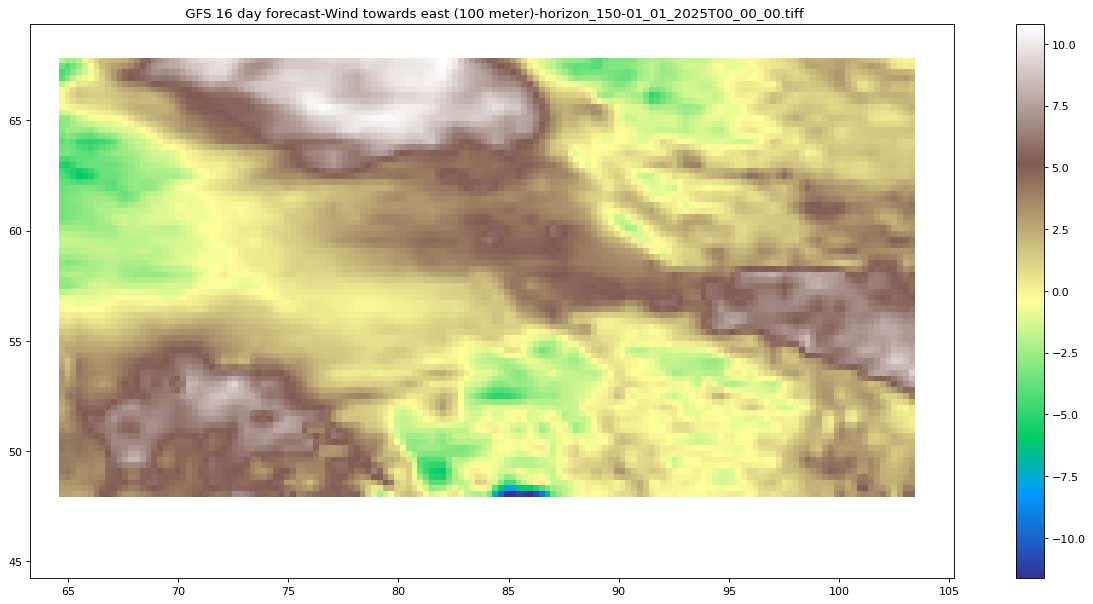

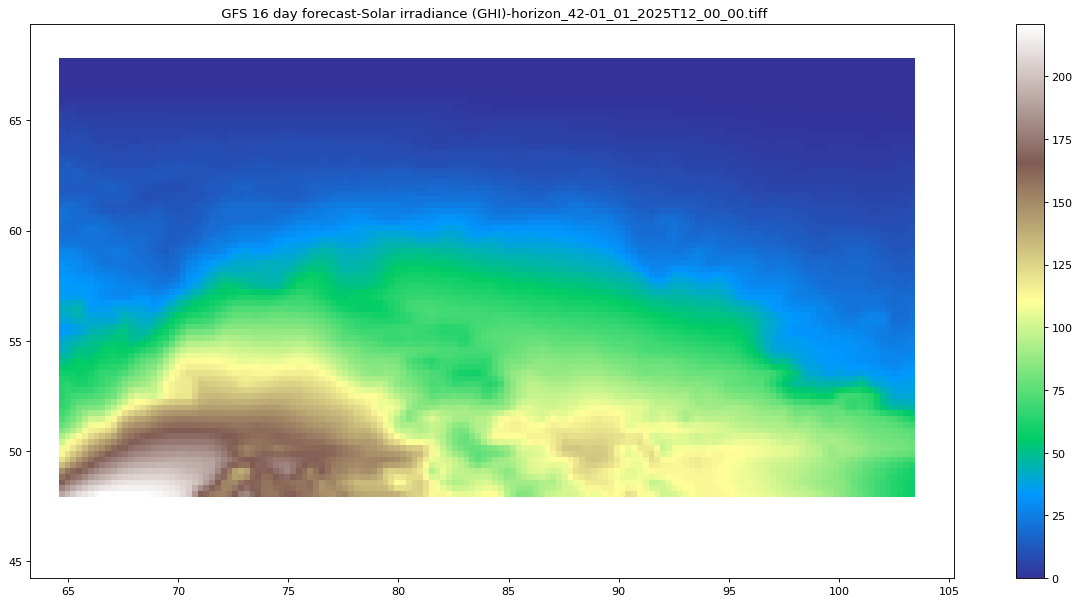

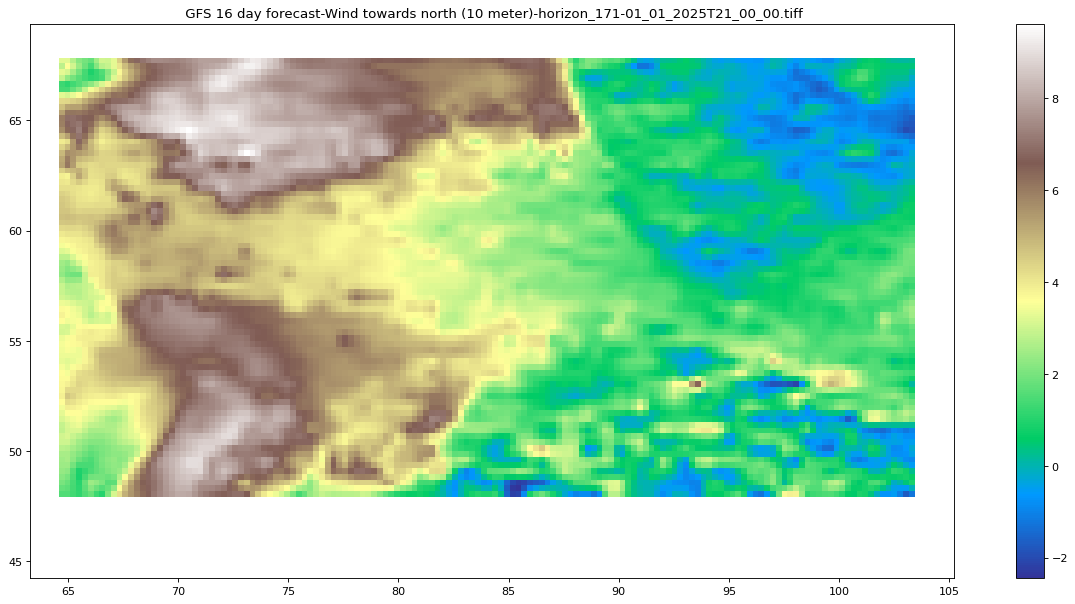

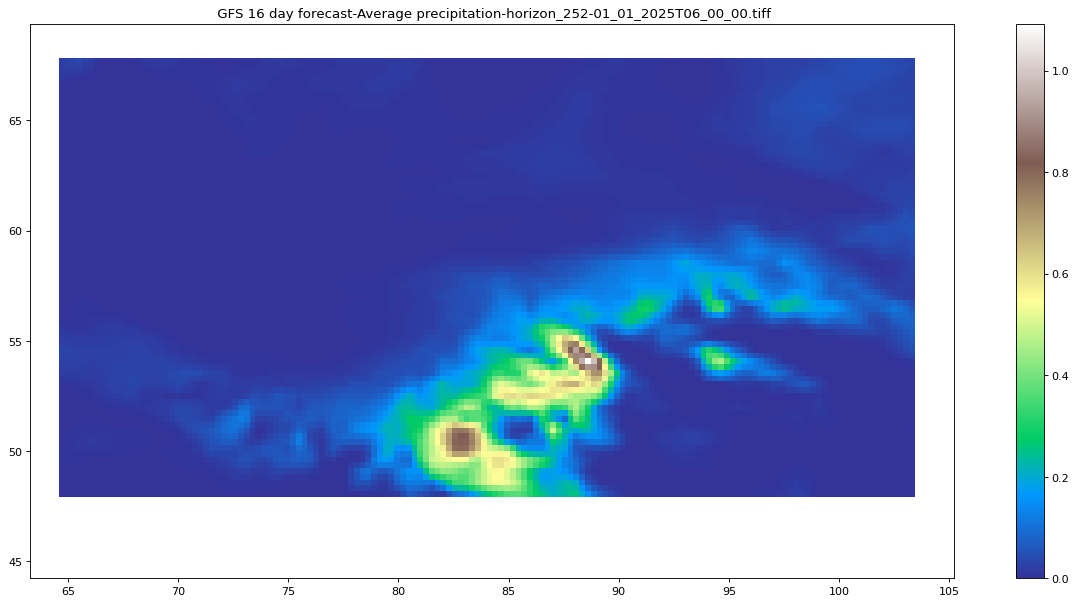

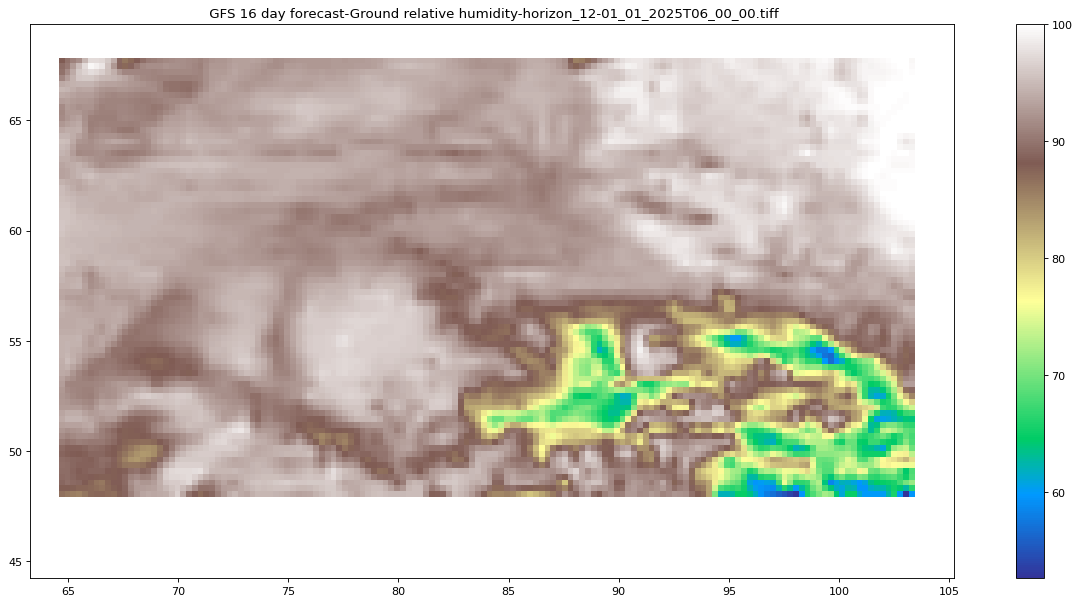

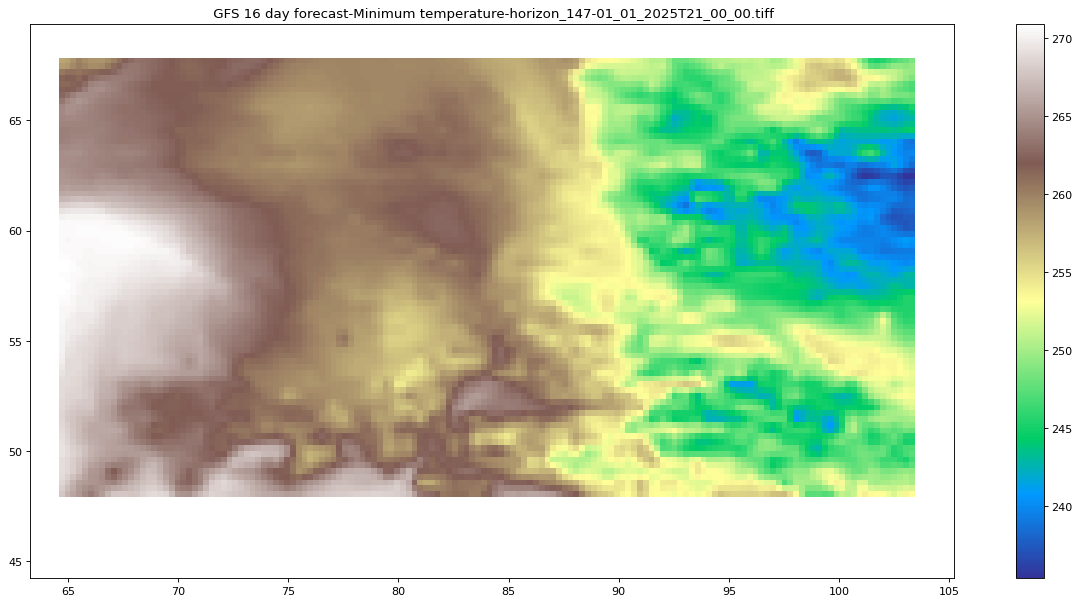

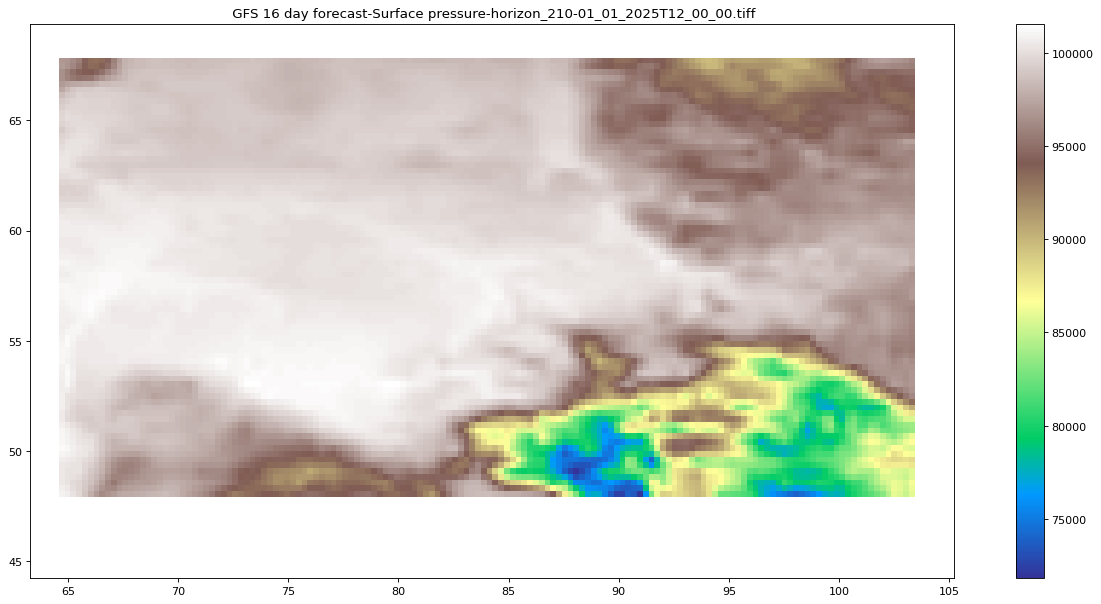

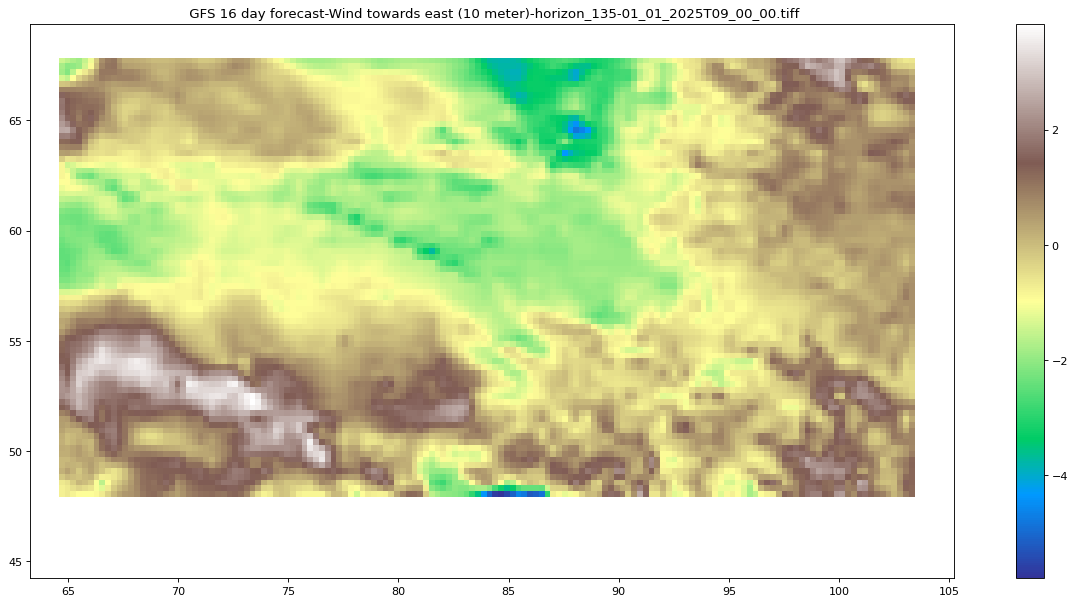

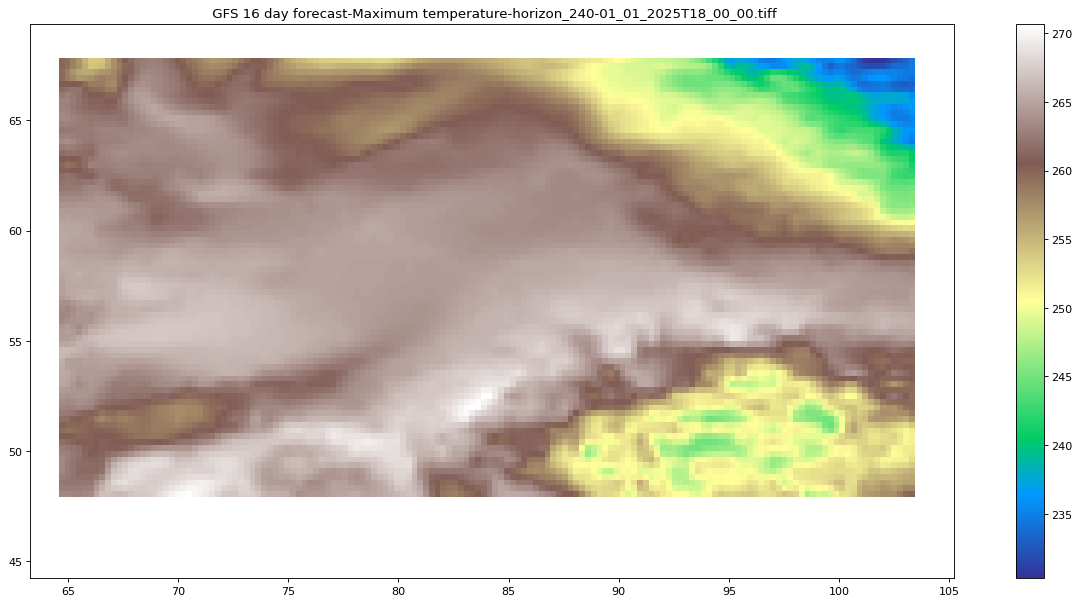

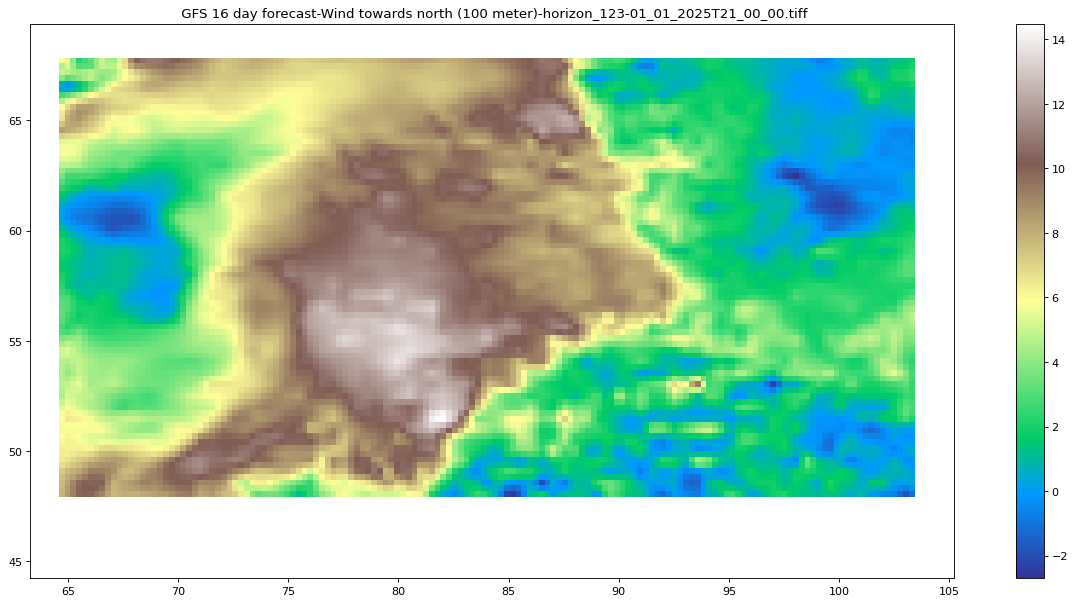

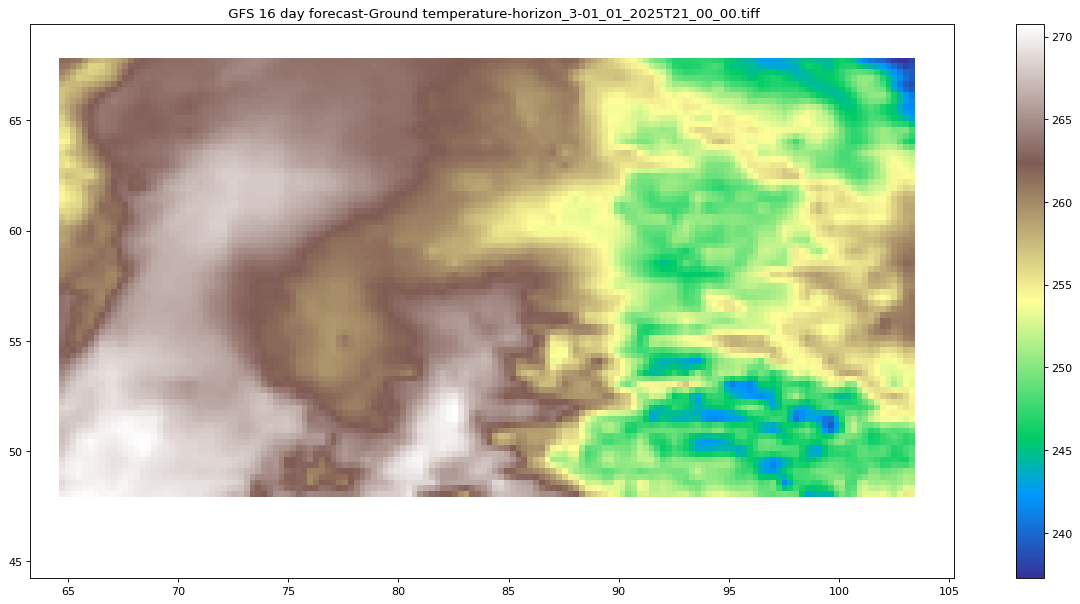

In [18]:
# Function to display the resulting Tiff(s).
gfs_hires_file_list = gfs_hires_result.list_files()
output_image_array = []
for file in gfs_hires_file_list:
    if file.endswith('.tiff'): #display the raster images
        with open(file+'.json', 'r') as summary_file:
            fileparms = json.load(summary_file)
        boundingBox=fileparms["boundingBox"]
        pixelStatistics=fileparms["rasterStatistics"]
        myextent=[boundingBox["minLongitude"],
                  boundingBox["maxLongitude"],
                  boundingBox["minLatitude"],
                  boundingBox["maxLatitude" ] ]  
        array_gfs_hires = np.array(PILImage.open(file))
        mask = (array_gfs_hires == -9999)
        # Masked array to exclude NO Data points from plotting
        masked_array = np.ma.masked_array(array_gfs_hires, mask)
        plt.figure(figsize = (20, 9), dpi=80) # Sets the size and resolution of the plot
        plt.imshow(masked_array,
                   cmap = 'terrain', 
                   vmin=pixelStatistics["pixelMin"], 
                   vmax=pixelStatistics["pixelMax"],
                   extent = myextent) # Loads the raster data and sets the colormap
        plt.colorbar() # Adds the color bar
        plt.title(" "+os.path.basename(file)) 
        output_image_path = os.path.splitext(os.path.basename(file))[0] + ".png"
        output_image_array.append(output_image_path)
        # Save the figure
        plt.savefig(output_image_path, bbox_inches='tight')
        plt.close() 

for output_image in output_image_array:
    #display the raster images
    display(Image(output_image,width=800, height=400))    

Each of the images above represents the atmospheric conditions in form of the GFS 16 day forecast Data Layers for the queried spatial location and temporal period. The color code scale represents the variation of the values of the atmospheric variables in form of the GFS 16 day forecast Data Layers for the given square area. This information makes it easier to interpret regional differences and trends in atmospheric conditions..

## References
https://vlab.noaa.gov/web/gfs